In [ ]:
# 30个频率频道 116*116输入   3种不同3dcnn模型的对比  

In [ ]:
# !pip install import-ipynb
# import import_ipynb
%tensorflow_version 1.x

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
from keras.models import Model, Sequential 
from keras.layers import Conv1D,Flatten,Conv2D, Dropout, MaxPooling2D, Input,Conv3D, MaxPooling3D, Dense, BatchNormalization
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')
# # %cd "/content/drive/My Drive/Colab Notebooks"
# from model_functions import *

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 新做的

In [2]:
data = []
label2 = []
label3 = []
for i in range(1,25):
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/150_6_116_116_' + str(i) +'_flipped.npy')
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(i) + '.npy')  #两个label
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(i) + '.npy')  #三个label
  data.append(a)
  label2.append(c)
  label3.append(d)

In [3]:
Data, Label2, Label3 = shuffle(data, label2, label3, random_state = 20)


In [4]:
P = np.array(Data)
P = np.reshape(P,(3600,6,116,116,1))

L2 = np.array(Label2)
L2 = np.reshape(L2,(3600,2))

L3 = np.array(Label3)
L3 = np.reshape(L3,(3600,3))
print(P.shape)
print(L2.shape)
print(L3.shape)
#输入数据
train_data = P[:2700]  
test_data = P[2700:]

(3600, 6, 116, 116, 1)
(3600, 2)
(3600, 3)


In [5]:
# 全部打乱 没有按照病人
Data, Label2, Label3 = shuffle(Data, Label2, Label3, random_state = 20)


In [6]:
# 2 label
train_label  = L2[:2700]
test_label = L2[2700:]


print(train_data.shape)
print(train_label.shape)

(2700, 6, 116, 116, 1)
(2700, 2)


In [7]:
# 3 label
train_label  = L3[:2700]
test_label = L3[2700:]

print(train_data.shape)
print(train_label.shape)

(2700, 6, 116, 116, 1)
(2700, 3)


In [8]:
train_data, train_label = shuffle(train_data, train_label, random_state = 20)

In [9]:
# count = 0
# for i in range(24):
#   for j in range(150):
#     # if Label3[i,j,0] + Label3[i,j,1] + Label3[i,j,2]  == 1:
#     if L3[i,j,0] + L3[i,j,1] + L3[i,j,2]  == 1:
#       count+=1
# print(count)

count = 0
for i in range(3600):
    if L3[i,0] + L3[i,1] + L3[i,2]  == 1:
      count+=1
print(count)

# print(L3)

3600


In [ ]:

# # data1 = np.load('/content/drive/My Drive/Newdata/original/allpre.npy') 
# # data2 = np.load('/content/drive/My Drive/Newdata/original/allpost.npy') 
# # data3 = np.load('/content/drive/My Drive/Newdata/original/allfu.npy') 
# # data = np.concatenate((data1,data2,data3), axis = 0)

# data0 = np.load('/content/drive/My Drive/Newdata/original/allcontrol.npy') 
# data1 = np.load('/content/drive/My Drive/Newdata/changed/allpre.npy') 
# data2 = np.load('/content/drive/My Drive/Newdata/changed/allpost.npy') 
# data3 = np.load('/content/drive/My Drive/Newdata/changed/allfu.npy') 
# data = np.concatenate((data0,data1,data2,data3), axis = 0) 

# label = np.load('/content/drive/My Drive/Newdata/original/4800.npy')
# data, label = shuffle(data,label,random_state=20)
# # data, label = shuffle(data,label[1200:],random_state=20)
# # np.save("/content/drive/My Drive/Newdata/all4800",Data)

# np.save("/content/drive/My Drive/Newdata/shuffle_changedin4800",data)
# np.save("/content/drive/My Drive/Newdata/shuffle_changedout4800",label)

In [10]:
def Model():
  model = Sequential()
  initializer = tf.keras.initializers.HeNormal()
  model.add(Conv3D(32, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer, input_shape=(6,116,116, 1)))
  model.add(MaxPooling3D(pool_size=(1, 2, 2)))
  model.add(Dropout(0.3))
  # model.add(Conv3D(64, kernel_size=(2, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(Dropout(0.3))
  model.add(Conv3D(64, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  model.add(MaxPooling3D(pool_size=(1, 2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv3D(128, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  model.add(Dropout(0.3))
  # model.add(Conv3D(128, kernel_size=(2, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(Dropout(0.3))
  model.add(Conv3D(128, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  model.add(MaxPooling3D(pool_size=(1, 2, 2)))
  model.add(Dropout(0.3))
  # model.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(Dropout(0.3))
  # model.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(Dropout(0.3))
  model.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  model.add(MaxPooling3D(pool_size=(1, 2, 2)))
  model.add(Dropout(0.3))
  # model.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(MaxPooling3D(pool_size=(1, 2, 2)))
  # model.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(MaxPooling3D(pool_size=(1, 2, 2)))
  # model.add(Dropout(0.3))
  # model.add(Conv3D(512, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(MaxPooling3D(pool_size=(1, 2, 2)))
  # model.add(Dropout(0.3))
  # model.add(Conv3D(1024, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(MaxPooling3D(pool_size=(1, 2, 2)))
  # model.add(Dropout(0.3))
  # model.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(Conv3D(32, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(Conv3D(32, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(Conv3D(32, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.3))
  # model.add(Conv3D(64, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  # model.add(BatchNormalization()) 
  # model.add(Dropout(0.5))
  # model.add(Conv3D(128, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  # model.add(Dropout(0.5))
  # model.add(BatchNormalization())
  # model.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer=initializer))
  # model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu', kernel_initializer=initializer))
  model.add(Dense(3))
  model.summary()
  from keras.optimizers import RMSprop,Adam,SGD
  model.compile(optimizer = SGD(learning_rate=0.0001, momentum=0.9),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  return model

model = Model()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 6, 114, 114, 32)   320       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 6, 57, 57, 32)     0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 57, 57, 32)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 6, 55, 55, 64)     18496     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 6, 27, 27, 64)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 27, 27, 64)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 6, 25, 25, 128)    7

In [11]:
# model  = Model()
num_epochs = 100
batchsize = 32

history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=1)

Epoch 1/100
85/85 [==============================] - 8s 99ms/step - loss: 1.2537 - mae: 0.8830
Epoch 2/100
85/85 [==============================] - 8s 97ms/step - loss: 0.8403 - mae: 0.7168
Epoch 3/100
85/85 [==============================] - 8s 97ms/step - loss: 0.5324 - mae: 0.5509
Epoch 4/100
85/85 [==============================] - 8s 97ms/step - loss: 0.3137 - mae: 0.4118
Epoch 5/100
85/85 [==============================] - 8s 97ms/step - loss: 0.2243 - mae: 0.3379
Epoch 6/100
85/85 [==============================] - 8s 97ms/step - loss: 0.1663 - mae: 0.2892
Epoch 7/100
85/85 [==============================] - 8s 96ms/step - loss: 0.1297 - mae: 0.2545
Epoch 8/100
85/85 [==============================] - 8s 96ms/step - loss: 0.1115 - mae: 0.2296
Epoch 9/100
85/85 [==============================] - 8s 96ms/step - loss: 0.0894 - mae: 0.2103
Epoch 10/100
85/85 [==============================] - 8s 96ms/step - loss: 0.0782 - mae: 0.1945
Epoch 11/100
85/85 [=============================

Text(0, 0.5, 'Loss & MAE')

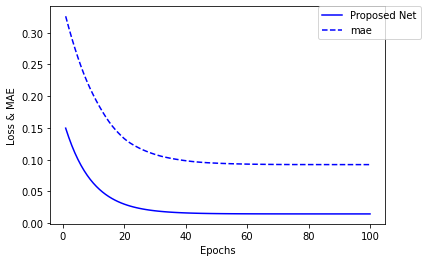

In [17]:


mse = history.history['loss'] 
mae = history.history['mae']
# mse1 = history1.history['loss']
# mae1 = history1.history['mae']
# mse2 = history2.history['loss']
# mae2 = history2.history['mae']
# mse3 = history3.history['loss']
# mae3 = history3.history['mae']
# mse4 = history4.history['loss']
# mae4 = history4.history['mae']
# mse5 = history5.history['loss']
# mae5 = history5.history['mae']

# mse6 = history6.history['loss']
# mae6 = history6.history['mean_absolute_error']
# mse7 = history7.history['loss']
# mae7 = history7.history['mean_absolute_error']
# mse8 = history8.history['loss']
# mae8 = history8.history['mean_absolute_error']

# model = ZF_Net()
# model1 = VGG16()
# model2 = ResNet50()
# model3 = Xception()
# model4 = DenseNet121()
# model5 = MobileNet()
# model6 = get_model9()

epochs = range(1,len(mse) +1)
plt.plot(epochs, mse, 'b', label='Proposed Net')
plt.plot(epochs, mae, 'b--', label='mae')
# plt.plot(epochs, mse1, 'r', label='VGG16')
# plt.plot(epochs, mae1, 'r--', label='mae1')
# plt.plot(epochs, mse2, 'g', label='ResNet50')
# plt.plot(epochs, mae2, 'g--', label='mae2')
# plt.plot(epochs, mse3, 'c', label='Xception')
# plt.plot(epochs, mae3, 'c--', label='mae3')
# plt.plot(epochs, mse4, 'm', label='DenseNet121')
# plt.plot(epochs, mae4, 'm--', label='mae4')
# plt.plot(epochs, mse5, 'y', label='MobileNet')
# plt.plot(epochs, mae5, 'y--', label='mae5')
# plt.plot(epochs, mse6, 'k', label='model9')
# plt.plot(epochs, mae6, 'k--', label='mae6')
# plt.plot(epochs, mse7, '#9467bd', label='mse7')
# plt.plot(epochs, mae7, '#9467bd',linestyle='dashed', label='mae7')
# plt.plot(epochs, mse8, '#e377c2', label='mse8')
# plt.plot(epochs, mae8, '#e377c2',linestyle='dashed', label='mae8')

plt.legend(bbox_to_anchor=(0.8, 1), loc='upper left', borderaxespad=0.)

# plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss & MAE')
# plt.show() 
# plt.savefig('/content/drive/My Drive/images/pretrained_models_3_wo.png' ,dpi=1200)

In [18]:


newx = test_data 
m = model.predict(newx) * 100
# m1 = model1.predict(newx) * 100
# m2 = model2.predict(newx) * 100
# m3 = model3.predict(newx) * 100
# m4 = model4.predict(newx) * 100
# m5 = model5.predict(newx) * 100
print(m.shape)


(900, 3)


In [19]:
print(test_label[0])
print(m[0])

[0.22222222 0.10884354 0.66893424]
[37.268604 10.307254 52.088566]


In [20]:
c1 = test_label[:,0] * 100# 对测试集的真实数值c1进行大小排列  
c2 = test_label[:,1] * 100# 对测试集的真实数值c2进行大小排列
c3 = test_label[:,2] * 100# 对测试集的真实数值c3进行大小排列

# print(y_data_c1)

index1 = np.argsort(c1) #c1提取出按照从小到大的对应index
index2 = np.argsort(c2)   #c2提取出按照从小到大的对应index
index3 = np.argsort(c3)  #c3提取出按照从小到大的对应index 

c1.sort()
c2.sort()
c3.sort()
# print(index1)

yc1 = []
yc2 = []
yc3 = []
# y1c1 = []
# y1c2 = []
# y1c3 = []
# y2c1 = []
# y2c2 = []
# y2c3 = []
# y3c1 = []
# y3c2 = []
# y3c3 = []
# y4c1 = []
# y4c2 = []
# y4c3 = []
# y5c1 = []
# y5c2 = []
# y5c3 = []

for i in range(900):
  yc1.append([m[i,0],index1[i]])
  yc2.append([m[i,1],index2[i]])
  yc3.append([m[i,2],index3[i]])
  # y1c1.append([m1[i,0],index1[i]])
  # y1c2.append([m1[i,1],index2[i]])
  # y1c3.append([m1[i,2],index3[i]])
  # y2c1.append([m2[i,0],index1[i]])
  # y2c2.append([m2[i,1],index2[i]])
  # y2c3.append([m2[i,2],index3[i]])
  # y3c1.append([m3[i,0],index1[i]])
  # y3c2.append([m3[i,1],index2[i]])
  # y3c3.append([m3[i,2],index3[i]])
  # y4c1.append([m4[i,0],index1[i]])
  # y4c2.append([m4[i,1],index2[i]])
  # y4c3.append([m4[i,2],index3[i]])
  # y5c1.append([m5[i,0],index1[i]])
  # y5c2.append([m5[i,1],index2[i]])
  # y5c3.append([m5[i,2],index3[i]])

yc1.sort(key = lambda x: x[1]) 
yc2.sort(key = lambda x: x[1])
yc3.sort(key = lambda x: x[1])
# y1c1.sort(key = lambda x: x[1]) 
# y1c2.sort(key = lambda x: x[1])
# y1c3.sort(key = lambda x: x[1])
# y2c1.sort(key = lambda x: x[1]) 
# y2c2.sort(key = lambda x: x[1])
# y2c3.sort(key = lambda x: x[1])
# y3c1.sort(key = lambda x: x[1]) 
# y3c2.sort(key = lambda x: x[1])
# y3c3.sort(key = lambda x: x[1])
# y4c1.sort(key = lambda x: x[1]) 
# y4c2.sort(key = lambda x: x[1])
# y4c3.sort(key = lambda x: x[1])
# y5c1.sort(key = lambda x: x[1]) 
# y5c2.sort(key = lambda x: x[1])
# y5c3.sort(key = lambda x: x[1])  





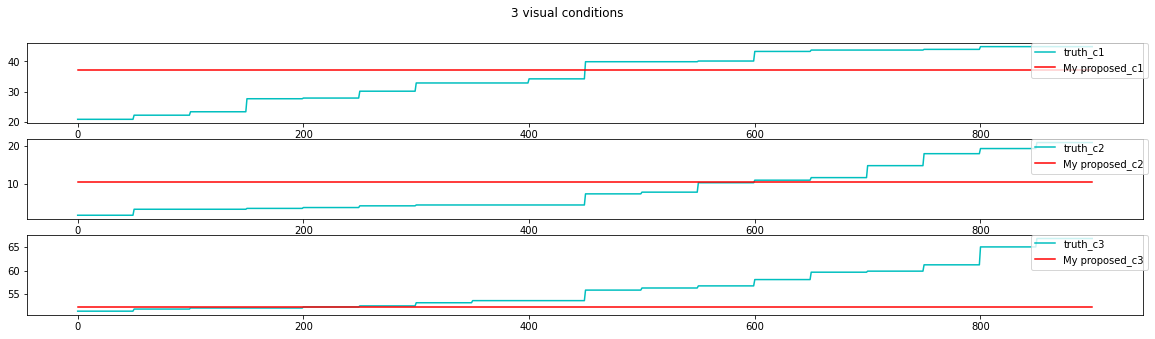

In [21]:
samples = 900
x_data = range(samples)
# y_data_c1 = test_label[:,0]  
# y_data_c2 = test_label[:,1]
# y_data_c3 = test_label[:,2]

yc1 = np.array(yc1)
yc2 = np.array(yc2)
yc3 = np.array(yc3)
# y1c1 = np.array(y1c1)
# y1c2 = np.array(y1c2)
# y1c3 = np.array(y1c3)
# y2c1 = np.array(y2c1)
# y2c2 = np.array(y2c2)
# y2c3 = np.array(y2c3)
# y3c1 = np.array(y3c1)
# y3c2 = np.array(y3c2)
# y3c3 = np.array(y3c3)
# y4c1 = np.array(y4c1)
# y4c2 = np.array(y4c2)
# y4c3 = np.array(y4c3)
# y5c1 = np.array(y5c1)
# y5c2 = np.array(y5c2)
# y5c3 = np.array(y5c3)

# y_predict_c1 = m[:,0]
# y_predict_c2 = m[:,1]
# y_predict_c3 = m[:,2]
# y_predict1_c1 = m1[:,0]
# y_predict1_c2 = m1[:,1]
# y_predict1_c3 = m1[:,2]
# y_predict2_c1 = m2[:,0]
# y_predict2_c2 = m2[:,1]
# y_predict2_c3 = m2[:,2]
# y_predict3_c1 = m3[:,0]
# y_predict3_c2 = m3[:,1]
# y_predict3_c3 = m3[:,2]
# y_predict4_c1 = m4[:,0]
# y_predict4_c2 = m4[:,1]
# y_predict4_c3 = m4[:,2]
# y_predict5_c1 = m5[:,0]
# y_predict5_c2 = m5[:,1]
# y_predict5_c3 = m5[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3,figsize=(20,5))
fig.suptitle('3 visual conditions')


predict_c1.plot(x_data, c1[:samples] , 'c', label='truth_c1')
predict_c2.plot(x_data, c2[:samples] , 'c', label='truth_c2')
predict_c3.plot(x_data, c3[:samples] , 'c', label='truth_c3')
predict_c1.plot(x_data, yc1[:samples,0] , 'r', label='My proposed_c1')
predict_c2.plot(x_data, yc2[:samples,0], 'r', label='My proposed_c2')
predict_c3.plot(x_data, yc3[:samples,0], 'r', label='My proposed_c3')
# predict_c1.plot(x_data, y1c1[:samples,0] , 'b', label='VGG16_c1')
# predict_c2.plot(x_data, y1c2[:samples,0] , 'b', label='VGG16_c2')
# predict_c3.plot(x_data, y1c3[:samples,0] , 'b', label='VGG16_c3')
# predict_c1.plot(x_data, y2c1[:samples,0] , 'k', label='ResNet50_c1')
# predict_c2.plot(x_data, y2c2[:samples,0] , 'k', label='ResNet50_c2')
# predict_c3.plot(x_data, y2c3[:samples,0] , 'k', label='ResNet50_c3')
# predict_c1.plot(x_data, y3c1[:samples,0] , 'm', label='Xception_c1')
# predict_c2.plot(x_data, y3c2[:samples,0] , 'm', label='Xception_c2')
# predict_c3.plot(x_data, y3c3[:samples,0] , 'm', label='Xception_c3')
# predict_c1.plot(x_data, y4c1[:samples,0] , 'y', label='DenseNet121_c1')
# predict_c2.plot(x_data, y4c2[:samples,0] , 'y', label='DenseNet121_c2')
# predict_c3.plot(x_data, y4c3[:samples,0] , 'y', label='DenseNet121_c3')
# predict_c1.plot(x_data, y5c1[:samples,0] , 'g', label='MobileNet_c1')
# predict_c2.plot(x_data, y5c2[:samples,0] , 'g', label='MobileNet_c2')
# predict_c3.plot(x_data, y5c3[:samples,0] , 'g', label='MobileNet_c3')


predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)


# plt.plot(x_data, y_data_c1 , 'c', label='c1')
# plt.plot(x_data, y_data_c2 , 'r', label='c2')
# plt.plot(x_data, y_data_c3 , 'b', label='c3')
# plt.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
# plt.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
# plt.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
# plt.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
# plt.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
# plt.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
# plt.plot(x_data, y_predict3_c1 , 'c-.', label='predict3_c1')
# plt.plot(x_data, y_predict3_c2 , 'r-.', label='predict3_c2')
# plt.plot(x_data, y_predict3_c3 , 'b-.', label='predict3_c3')

# plt.legend(loc="upper right",fontsize = 'small',bbox_to_anchor=(0.5, -0.05))

# plt.title('loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show() 
# fig.savefig('/content/drive/My Drive/33333333_wo.png' ,dpi=800)

In [22]:
def calculate_mse(predict):   #对比三种视觉情况 每个model的mse  
  y_data_c1 = test_label[:,0] 
  y_data_c2 = test_label[:,1] 
  y_data_c3 = test_label[:,2] 
  y_predict1_c1 = predict[:,0]/100
  y_predict1_c2 = predict[:,1]/100
  y_predict1_c3 = predict[:,2]/100
  tmp1 = 0
  tmp2 = 0
  tmp3 = 0
  for i in range(900):
    tmp1 = tmp1 + (y_data_c1[i]- y_predict1_c1[i])**2
    tmp2 = tmp2 + (y_data_c2[i]- y_predict1_c2[i])**2
    tmp3 = tmp3 + (y_data_c3[i]- y_predict1_c3[i])**2
  c1 = tmp1/900
  c2 = tmp2/900
  c3 = tmp3/900
  # c1 = K.mean(K.square( y_data_c1- y_predict1_c1), axis=-1)
  # c2 = K.mean(K.square( y_data_c2- y_predict1_c2), axis=-1)
  # c3 = K.mean(K.square( y_data_c3- y_predict1_c3), axis=-1)
  return c1, c2, c3 


In [23]:
r = r2_score(test_label, m/100, multioutput='raw_values')
# r1 = r2_score(test_label, m1/100, multioutput='raw_values')
# r2 = r2_score(test_label, m2/100, multioutput='raw_values')
# r3 = r2_score(test_label, m3/100, multioutput='raw_values')
# r4 = r2_score(test_label, m4/100, multioutput='raw_values')
# r5 = r2_score(test_label, m5/100, multioutput='raw_values')

print(r)
# print(r1)
# print(r2)
# print(r3)
# print(r4)
# print(r5)

[-0.05349441 -0.0949387  -0.77712712]


In [ ]:
Model = calculate_mse(m)
# Model1 = calculate_mse(m1)
# Model2 = calculate_mse(m2)
# Model3 = calculate_mse(m3)
# Model4 = calculate_mse(m4)
# Model5 = calculate_mse(m5)

print(Model)
# print(Model1)
# print(Model2)
# print(Model3)
# print(Model4)
# print(Model5)

(0.027414716999987144, 0.005371076580189498, 0.022139385956551176)


In [ ]:
data = np.load('/content/drive/My Drive/Newdata/shuffle_changedin3600.npy')
label = np.load('/content/drive/My Drive/Newdata/shuffle_changedout3600.npy')
data = np.reshape(data,(3600,30,116,116,1))
split_rate= 0.7
split = int(split_rate*3600)
train_data = data[:split]
train_label = label[:split]
test_data = data[split:]
test_label = label[split:] 


def k_fold(k,train_data,train_targets):
  num_val_samples = len(train_data)//k
  val_mses = []
  val_maes = []
  mse_History = []
  mae_History = []
  num_epochs = 50
  batchsize = 6
  R2 = []
  Comparision = []
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = Model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
    comparision1 = (model.predict(test_data))*100
    Test_label = test_label*100
    Comparision.append(comparision1)
    # r2_score(Test_label, comparision1, multioutput='raw_values')
    R2.append(r2_score(Test_label, comparision1, multioutput='raw_values'))
    # val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    # mse_history = history.history['loss']
    # mae_history = history.history['mean_absolute_error']
    # val_mses.append(val_mse)
    # val_maes.append(val_mae)
    # mse_History.append(mse_history)
    # mae_History.append(mae_history)
  # return val_mses, val_maes, mse_History, mae_History
  return  R2,Comparision

R2_score, Predict_results = k_fold(5,train_data,train_label)


# average_mae_history = [(np.mean([x[i] for x in mae_history]))*100 for i in range(50)] 
# average_mse_history = [(np.mean([x[i] for x in mse_history]))*100 for i in range(50)] 
# #model 3Dcnn 
# epochs = range(1,len(average_mse_history)+1)
# plt.plot(epochs, average_mae_history,'c',  label='mae' )
# plt.plot(epochs, average_mse_history,'m',  label='mse' )
# plt.xlabel('Epochs')
# plt.ylabel('Validation')
# plt.show()


In [ ]:
data = np.load('/content/drive/My Drive/Newdata/shuffle_changedin4800.npy')
label = np.load('/content/drive/My Drive/Newdata/shuffle_changedout4800.npy')
data = np.reshape(data,(4800,30,116,116,1))
split_rate= 0.7
split = int(split_rate*4800)
train_data = data[:split]
train_label = label[:split]
test_data = data[split:]
test_label = label[split:] 
num_epochs = 50
batchsize = 6
model = Model()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=0)

array([0.94252031, 0.90902976, 0.9297045 ])

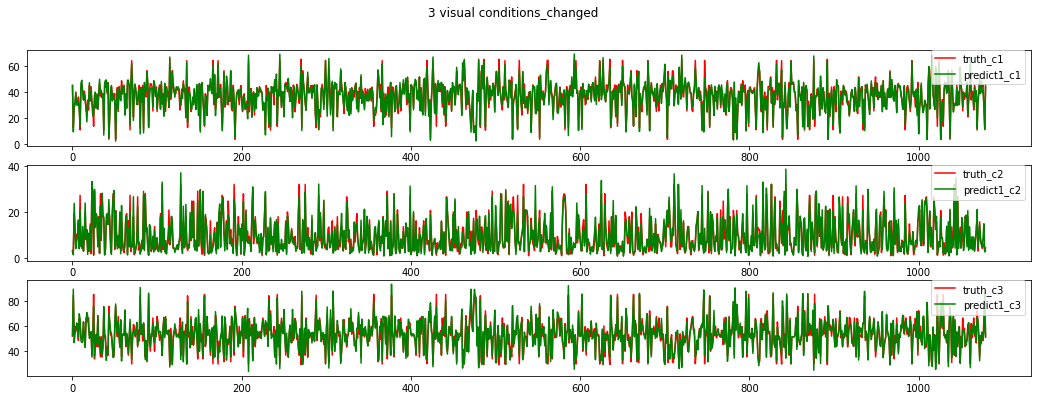

In [ ]:
# mse_history = history.history['loss']
# mae_history = history.history['mean_absolute_error'] 
comparision1 = (model.predict(test_data))*100
x_data = range(1080)
Test_label = test_label*100
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3,figsize=(18,6))
fig.suptitle('3 visual conditions_changed') 
# predict_c1.axes([0, 0.6, 1, 1])
# plt.subplots(figsize=(50, 10))
# plt.figure(figsize=(30,10)
# fig, ax = plt.subplots(figsize=(20, 10))
# predict_c1.figure(figsize=(30,10)

# bins = np.linspace(-1, 1, 21) #横坐标起始和结束值，分割成21份
# predict_c1.figure(figsize=(13,5)) #图像大小
# predict_c1.xticks(bins) #设置x轴
# predict_c1.xlim(-1, 1) #x轴开始和结束位置
# f = plt.figure(figsize=(20, 2))
# ax = f.add_subplot(111)
# predict_c1.figure(figsize=(13,5))
# predict_c1.autoscale(enable=True, axis='x', tight=True)#plt.axis('tight')
# predict_c1
predict_c1.plot(x_data, y_data_c1 , 'r', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'r', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'g', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'g', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'g', label='predict1_c3')
predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
plt.savefig('/content/drive/My Drive/changed3600_50epo_0.7.png' ,dpi=1200)
from sklearn.metrics import r2_score
r2_score(Test_label, comparision1, multioutput='raw_values')


#以下不要动系列  都是以前做的东西

In [ ]:
def Model():
  model = Sequential()
  model.add(Conv3D(32, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(30,116,116, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  # model.add(Dropout(0.3))
  model.add(Conv3D(64, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization()) 
  # model.add(Dropout(0.5))
  model.add(Conv3D(128, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  # model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3, activation='softmax'))
  model.summary()
  from keras.optimizers import RMSprop,Adam
  model.compile(optimizer = Adam(lr=0.00001),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  return model



In [ ]:
data = np.load('/content/drive/My Drive/Newdata/shuffle_changedin3600.npy')
label = np.load('/content/drive/My Drive/Newdata/shuffle_changedout3600.npy')
data = np.reshape(data,(3600,30,116,116,1))
split_rate= 0.7
split = int(split_rate*3600)
train_data = data[:split]
train_label = label[:split]
test_data = data[split:]
test_label = label[split:] 


def k_fold(k,train_data,train_targets):
  num_val_samples = len(train_data)//k
  val_mses = []
  val_maes = []
  mse_History = []
  mae_History = []
  num_epochs = 50
  batchsize = 6
  R2 = []
  Comparision = []
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = Model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
    comparision1 = (model.predict(test_data))*100
    Test_label = test_label*100
    Comparision.append(comparision1)
    # r2_score(Test_label, comparision1, multioutput='raw_values')
    R2.append(r2_score(Test_label, comparision1, multioutput='raw_values'))
    # val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    # mse_history = history.history['loss']
    # mae_history = history.history['mean_absolute_error']
    # val_mses.append(val_mse)
    # val_maes.append(val_mae)
    # mse_History.append(mse_history)
    # mae_History.append(mae_history)
  # return val_mses, val_maes, mse_History, mae_History
  return  R2,Comparision

R2_score, Predict_results = k_fold(5,train_data,train_label)


# average_mae_history = [(np.mean([x[i] for x in mae_history]))*100 for i in range(50)] 
# average_mse_history = [(np.mean([x[i] for x in mse_history]))*100 for i in range(50)] 
# #model 3Dcnn 
# epochs = range(1,len(average_mse_history)+1)
# plt.plot(epochs, average_mae_history,'c',  label='mae' )
# plt.plot(epochs, average_mse_history,'m',  label='mse' )
# plt.xlabel('Epochs')
# plt.ylabel('Validation')
# plt.show()


In [ ]:
data = np.load('/content/drive/My Drive/Newdata/shuffle_changedin4800.npy')
label = np.load('/content/drive/My Drive/Newdata/shuffle_changedout4800.npy')
data = np.reshape(data,(4800,30,116,116,1))
split_rate= 0.7
split = int(split_rate*4800)
train_data = data[:split]
train_label = label[:split]
test_data = data[split:]
test_label = label[split:] 
num_epochs = 50
batchsize = 6
model = Model()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=0)

array([0.94252031, 0.90902976, 0.9297045 ])

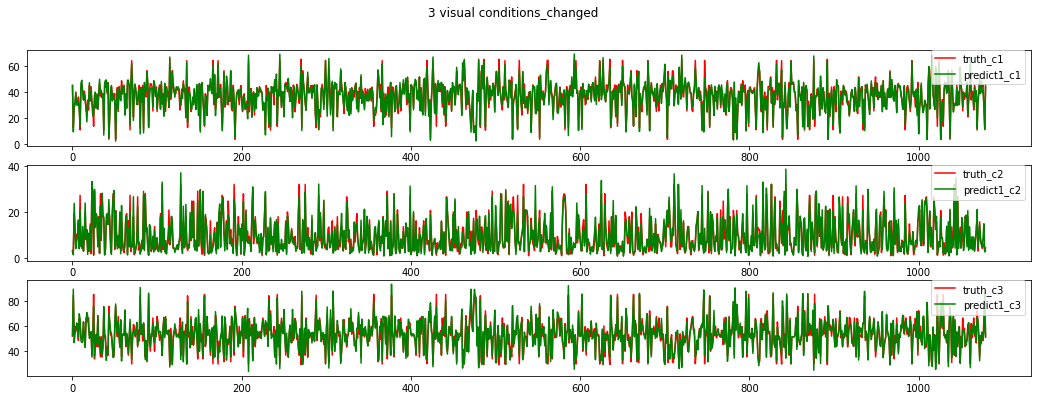

In [ ]:
# mse_history = history.history['loss']
# mae_history = history.history['mean_absolute_error'] 
comparision1 = (model.predict(test_data))*100
x_data = range(1080)
Test_label = test_label*100
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3,figsize=(18,6))
fig.suptitle('3 visual conditions_changed') 
# predict_c1.axes([0, 0.6, 1, 1])
# plt.subplots(figsize=(50, 10))
# plt.figure(figsize=(30,10)
# fig, ax = plt.subplots(figsize=(20, 10))
# predict_c1.figure(figsize=(30,10)

# bins = np.linspace(-1, 1, 21) #横坐标起始和结束值，分割成21份
# predict_c1.figure(figsize=(13,5)) #图像大小
# predict_c1.xticks(bins) #设置x轴
# predict_c1.xlim(-1, 1) #x轴开始和结束位置
# f = plt.figure(figsize=(20, 2))
# ax = f.add_subplot(111)
# predict_c1.figure(figsize=(13,5))
# predict_c1.autoscale(enable=True, axis='x', tight=True)#plt.axis('tight')
# predict_c1
predict_c1.plot(x_data, y_data_c1 , 'r', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'r', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'g', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'g', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'g', label='predict1_c3')
predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
plt.savefig('/content/drive/My Drive/changed3600_50epo_0.7.png' ,dpi=1200)
from sklearn.metrics import r2_score
r2_score(Test_label, comparision1, multioutput='raw_values')


In [ ]:
print(R2_score)

[14.28606959532887, 10.31977361156827, 8.288787343199292, 7.087509455011477, 6.393998254474903, 5.899437091919401, 5.547329206610955, 5.249745277983565, 5.094812046736479, 4.897077692643045, 4.701279528172953, 4.574828623897499, 4.45215425897567, 4.237463844437447, 4.096796153748911, 3.9726576080457083, 3.8879652648040697, 3.74768039987733, 3.5788028933373948, 3.498578339608179, 3.4031516651342075, 3.2814719953707288, 3.153142522103966, 3.038905148601366, 2.914107597861735, 2.83446734845047, 2.7812501777791314, 2.6599431127339366, 2.5748650143514316, 2.4919848444516814, 2.4153632337286597, 2.3618308556014824, 2.2611307183147544, 2.1874659769754445, 2.1656197414452594, 2.0542776108615928, 2.0125906509051603, 1.9524262656664682, 1.9234195801000746, 1.8560059287304445, 1.8147288048492065, 1.7376222426352637, 1.6794893975990517, 1.6456606567260765, 1.5925630499490548, 1.5525830278380048, 1.5182915361346825, 1.4902588269407195, 1.459501205189597, 1.4031148087676792]


In [ ]:
predict_c1.set_size_inches(18.5, 10.5, forward = True)


# !cat ~/.keras/keras.json

# from keras import backend
# backend.set_image_data_format('channels_first')
# print(backend.image_data_format())

# !cat ~/.keras/keras.json

AttributeError: ignored

In [ ]:
# # print(open("~/.keras/keras.json").read())
# content = {"epsilon": 1e-07, 
#     "floatx": "float32", 
#     "image_data_format": "channels_first", 
#     "backend": "tensorflow"}
# with open(" ~/.keras/keras.json",'w') as f:
#   f.write(str(content))
# # print(open("~/.keras/keras.json").read())


(116, 116)


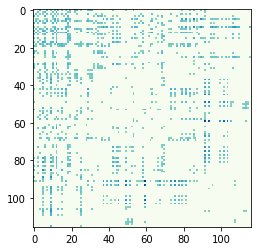

In [ ]:

# tmp = data2[3,0,:,:]
# # np.set_printoptions(threshold=np.inf)  #打印全部内容 没有缩写
# print(tmp.shape)
# # print(tmp[:,:])
# tmp=tmp.astype(np.float) # conver to float  and plot 
# # %matplotlib qt 
# %matplotlib inline
# plt.imshow(tmp,cmap='GnBu')
# plt.savefig('/content/drive/My Drive/input_example.png' ,dpi=2400)


(21, 21)


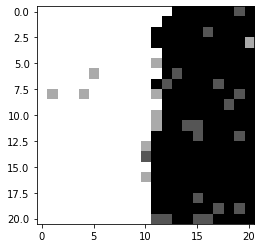

In [ ]:
# aaa = np.load('/content/drive/My Drive/output/M2.npy')
# ppp = aaa[0]
# print(ppp.shape)
# ppp=ppp.astype(np.float) # conver to float  and plot 
# # %matplotlib qt 
# %matplotlib inline
# plt.imshow(ppp,cmap='gray')
# plt.savefig('/content/drive/My Drive/output_example.png' ,dpi=2400)

In [ ]:
def SPLIT(data,split):

  data, label = shuffle(data, Label, random_state=20)

  train_data = data[:split]
  train_label = label[:split]
  test_data = data[split:]
  test_label = label[split:]

  return train_data, train_label, test_data, test_label


train_data, train_label, test_data, test_label = SPLIT(data,72)
# train_data1, train_label1, test_data1, test_label1 = SPLIT(data1,72)
# train_data2, train_label2, test_data2, test_label2 = SPLIT(data2,72)

In [ ]:
def k_fold(k,train_data,train_targets):
  num_val_samples = len(train_data)//k
  val_mses = []
  val_maes = []
  mse_History = []
  mae_History = []
  num_epochs = 100
  batchsize = 6
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = threeD_CNN1()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mse_history = history.history['loss']
    mae_history = history.history['mean_absolute_error']
    val_mses.append(val_mse)
    val_maes.append(val_mae)
    mse_History.append(mse_history)
    mae_History.append(mae_history)
  return val_mses, val_maes, mse_History, mae_History

val_mses1, val_maes1, mse_history1, mae_history1 = k_fold(4,train_data,train_label) 

average_mae_history1 = [(np.mean([x[i] for x in mae_history1]))*100 for i in range(100)] 
average_mse_history1= [(np.mean([x[i] for x in mse_history1]))*100 for i in range(100)] 
#model 3Dcnn 
epochs = range(1,len(average_mse_history1)+1)
plt.plot(epochs, average_mae_history1,'c',  label='mae' )
plt.plot(epochs, average_mse_history1,'m',  label='mse' )
plt.xlabel('Epochs')
plt.ylabel('Validation')
plt.show()
# batchsize = 6
# model1 = threeD_CNN()
# history1 = model1.fit(train_data, train_label, epochs = 100, batch_size = batchsize, verbose=0)
# model2 = threeD_CNN1()
# history2 = model2.fit(train_data, train_label, epochs = 100, batch_size = batchsize,verbose=0)
# model3 = threeD_CNN2()
# history3 = model3.fit(train_data, train_label, epochs = 100,batch_size = batchsize, verbose=0)


processing fold # 0
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_21 (Conv3D)           (None, 29, 115, 115, 32)  288       
_________________________________________________________________
max_pooling3d_21 (MaxPooling (None, 14, 57, 57, 32)    0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 57, 57, 32)    0         
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 13, 56, 56, 64)    16448     
_________________________________________________________________
max_pooling3d_22 (MaxPooling (None, 6, 28, 28, 64)     0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 6, 28, 28, 64)     0         
_________________________________________________________________
flatten_9 (Flatten)          (None

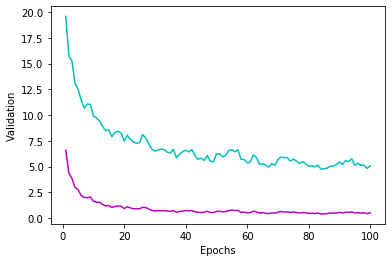

In [ ]:
def k_fold(k,train_data,train_targets):
  num_val_samples = len(train_data)//k
  val_mses = []
  val_maes = []
  mse_History = []
  mae_History = []
  num_epochs = 100
  batchsize = 6
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = threeD_CNN2()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mse_history = history.history['loss']
    mae_history = history.history['mean_absolute_error']
    val_mses.append(val_mse)
    val_maes.append(val_mae)
    mse_History.append(mse_history)
    mae_History.append(mae_history)
  return val_mses, val_maes, mse_History, mae_History

val_mses2, val_maes2, mse_history2, mae_history2 = k_fold(4,train_data,train_label) 

average_mae_history2 = [(np.mean([x[i] for x in mae_history2]))*100 for i in range(100)] 
average_mse_history2 = [(np.mean([x[i] for x in mse_history2]))*100 for i in range(100)] 
#model 3Dcnn 
epochs = range(1,len(average_mse_history2)+1)
plt.plot(epochs, average_mae_history2,'c',  label='mae' )
plt.plot(epochs, average_mse_history2,'m',  label='mse' )
plt.xlabel('Epochs')
plt.ylabel('Validation')
plt.show()
# batchsize = 6
# model1 = threeD_CNN()
# history1 = model1.fit(train_data, train_label, epochs = 100, batch_size = batchsize, verbose=0)
# model2 = threeD_CNN1()
# history2 = model2.fit(train_data, train_label, epochs = 100, batch_size = batchsize,verbose=0)
# model3 = threeD_CNN2()
# history3 = model3.fit(train_data, train_label, epochs = 100,batch_size = batchsize, verbose=0)


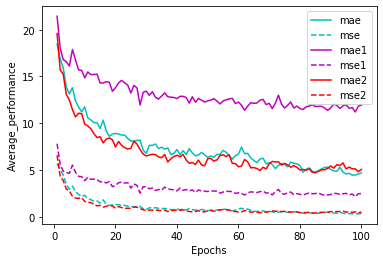

In [ ]:
epochs = range(1,len(average_mse_history)+1)
plt.plot(epochs, average_mae_history,'c',  label='mae' )
plt.plot(epochs, average_mse_history,'c--',  label='mse' )
plt.plot(epochs, average_mae_history1,'m',  label='mae1' )
plt.plot(epochs, average_mse_history1,'m--',  label='mse1' )
plt.plot(epochs, average_mae_history2,'r',  label='mae2' )
plt.plot(epochs, average_mse_history2,'r--',  label='mse2' )
plt.xlabel('Epochs')
plt.ylabel('Average_performance')
plt.legend()
# plt.show()
plt.savefig('/content/drive/My Drive/original_30_3models_comparison.png' ,dpi=1200)

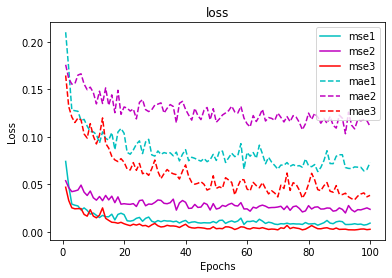

In [ ]:
mse1 = history1.history['loss']
mae1 = history1.history['mean_absolute_error']
mse2 = history2.history['loss']
mae2 = history2.history['mean_absolute_error']
mse3 = history3.history['loss']
mae3 = history3.history['mean_absolute_error']
# val_loss = history.history['val_loss']
# acc = history.history['acc']
# val_acc=history.history['val_acc']
epochs = range(1,len(mse1) +1)
plt.plot(epochs, mse1, 'c', label='mse1')
plt.plot(epochs, mse2, 'm', label='mse2')
plt.plot(epochs, mse3, 'r', label='mse3')

plt.plot(epochs, mae1, 'c--', label='mae1')
plt.plot(epochs, mae2, 'm--', label='mae2')
plt.plot(epochs, mae3, 'r--', label='mae3')

plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 
# plt.savefig('/content/drive/My Drive/original_30_3models_comparison.png' ,dpi=2400)

In [ ]:
comparision1 = (model1.predict(test_data))*100
comparision2 =(model2.predict(test_data))*100
comparision3 = (model3.predict(test_data))*100
print(comparision1[0,0])
print(comparision2)


39.035233
[[35.183926 25.042837 39.77324 ]
 [31.301392 24.081482 44.617126]
 [34.150146 23.816324 42.033527]
 [33.58196  24.590382 41.827656]
 [32.70749  23.568102 43.72441 ]
 [35.251457 23.56616  41.18238 ]
 [34.756668 23.026743 42.21659 ]
 [34.32223  22.69318  42.98459 ]
 [35.038273 25.837612 39.124115]
 [32.503586 25.232761 42.263645]
 [34.348892 23.681606 41.969505]
 [33.936367 24.502735 41.5609  ]
 [34.28524  25.764297 39.95047 ]
 [33.282448 25.603285 41.11427 ]
 [34.86227  23.936447 41.201286]
 [33.694874 26.284805 40.020317]
 [31.837702 24.39627  43.76603 ]
 [34.281387 24.067724 41.650887]
 [34.748295 24.943724 40.30798 ]
 [32.75339  23.521645 43.724964]
 [34.766727 24.363136 40.87014 ]
 [34.922493 24.246212 40.831295]
 [33.836    25.559933 40.604065]
 [35.15749  24.90954  39.93297 ]]


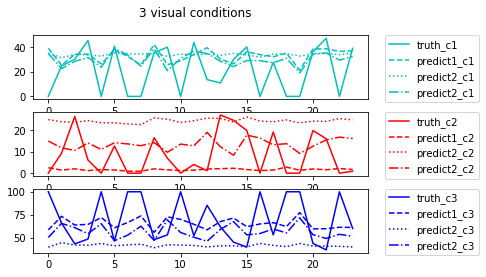

In [ ]:
x_data = range(24)
Test_label = test_label*100
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]
y_predict2_c1 = comparision2[:,0]
y_predict2_c2 = comparision2[:,1]
y_predict2_c3 = comparision2[:,2]
y_predict3_c1 = comparision3[:,0]
y_predict3_c2 = comparision3[:,1]
y_predict3_c3 = comparision3[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3)
fig.suptitle('3 visual conditions') 


predict_c1.plot(x_data, y_data_c1 , 'c', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'b', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
predict_c1.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
predict_c2.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
predict_c3.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
predict_c1.plot(x_data, y_predict3_c1 , 'c-.', label='predict2_c1')
predict_c2.plot(x_data, y_predict3_c2 , 'r-.', label='predict2_c2')
predict_c3.plot(x_data, y_predict3_c3 , 'b-.', label='predict2_c3')

predict_c1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# plt.title('loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show() 
# fig.savefig('/content/drive/My Drive/ready_data_6C/matrix_input/1.png' ,bbox_inches='tight')

In [ ]:
print(comparision1.shape)
y_data_c1 = test_label[:,0]
print(y_data_c1.shape)

(24, 3)
(24,)


In [ ]:
def calculate_mse(predict):   #对比三种视觉情况 每个model的mse  
  y_data_c1 = test_label[:,0]
  y_data_c2 = test_label[:,1]
  y_data_c3 = test_label[:,2]
  y_predict1_c1 = predict[:,0]
  y_predict1_c2 = predict[:,1]
  y_predict1_c3 = predict[:,2]
  tmp1 = 0
  tmp2 = 0
  tmp3 = 0
  for i in range(24):
    tmp1 = tmp1 + (y_data_c1[i]- y_predict1_c1[i])**2
    tmp2 = tmp2 + (y_data_c2[i]- y_predict1_c2[i])**2
    tmp3 = tmp3 + (y_data_c3[i]- y_predict1_c3[i])**2
  c1 = tmp1 /24 
  c2 = tmp2 /24
  c3 = tmp3 /24
  # c1 = K.mean(K.square( y_data_c1- y_predict1_c1), axis=-1)
  # c2 = K.mean(K.square( y_data_c2- y_predict1_c2), axis=-1)
  # c3 = K.mean(K.square( y_data_c3- y_predict1_c3), axis=-1)
  return c1 , c2 ,c3 


In [ ]:
# from keras import backend as K
Model1 = calculate_mse(comparision1)
Model2 = calculate_mse(comparision2)

In [ ]:
print(Model1)
print(Model2)

(499.6962840444788, 169.89101562525778, 609.0763322213749)
(503.6640901897347, 319.0462262979642, 1413.7208858089691)
